In [1]:
import pandas as pd
import numpy as np


train_df = pd.read_csv('archive (7)/train.csv')
validation_df = pd.read_csv('archive (7)/validation.csv')
test_df = pd.read_csv('archive (7)/test.csv')

# Lihat 5 baris pertama
train_df.head()

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.258235,79.665185,...,2.743879,0.906809,1.089243,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.876546,59.611505,...,2.587700,0.843739,0.879911,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.070623,70.577443,...,2.426294,0.850923,1.003442,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.909312,82.924450,...,3.558240,0.946786,1.814810,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.562294,95.352336,...,3.896884,0.988036,1.157241,1,1,0,0,0,3,4


## Exploratory Data Analysis

### Preprocessing Data

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000774 entries, 0 to 8000773
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Age                int64  
 1   Grade              int64  
 2   Gender             object 
 3   Race               object 
 4   SES_Quartile       int64  
 5   ParentalEducation  object 
 6   SchoolType         object 
 7   Locale             object 
 8   TestScore_Math     float64
 9   TestScore_Reading  float64
 10  TestScore_Science  float64
 11  GPA                float64
 12  AttendanceRate     float64
 13  StudyHours         float64
 14  InternetAccess     int64  
 15  Extracurricular    int64  
 16  PartTimeJob        int64  
 17  ParentSupport      int64  
 18  Romantic           int64  
 19  FreeTime           int64  
 20  GoOut              int64  
dtypes: float64(6), int64(10), object(5)
memory usage: 1.3+ GB


In [3]:
print(f'Rows amount: {train_df.shape[0]}')
print(f'Column amount: {train_df.shape[1]}')

Rows amount: 8000774
Column amount: 21


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8000774.0,15.999591,1.413915,14.000000,15.000000,16.000000,17.000000,18.000000
Grade,8000774.0,10.799739,1.165974,9.000000,10.000000,11.000000,12.000000,12.000000
SES_Quartile,8000774.0,2.499802,1.118161,1.000000,1.000000,3.000000,3.000000,4.000000
TestScore_Math,8000774.0,74.975542,9.944944,22.576813,68.246988,74.995312,81.741983,100.000000
TestScore_Reading,8000774.0,74.978937,9.943306,21.187972,68.252674,75.002107,81.743341,100.000000
TestScore_Science,8000774.0,74.978513,9.948554,19.188829,68.255227,75.001765,81.741739,100.000000
GPA,8000774.0,2.996743,0.459513,0.713181,2.685036,2.999824,3.314440,4.000000
AttendanceRate,8000774.0,0.899589,0.048062,0.700000,0.866952,0.899978,0.933040,1.000000
StudyHours,8000774.0,0.999726,0.348109,0.000000,0.764208,0.999894,1.235127,2.793829
InternetAccess,8000774.0,0.849827,0.357241,0.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.isna().sum().sort_values(ascending=False)

Age                  0
GPA                  0
FreeTime             0
Romantic             0
ParentSupport        0
PartTimeJob          0
Extracurricular      0
InternetAccess       0
StudyHours           0
AttendanceRate       0
TestScore_Science    0
Grade                0
TestScore_Reading    0
TestScore_Math       0
Locale               0
SchoolType           0
ParentalEducation    0
SES_Quartile         0
Race                 0
Gender               0
GoOut                0
dtype: int64

In [6]:
print(f'Duplicated data: {train_df.duplicated().sum()}')

Duplicated data: 0


In [7]:
# sampling dataset
def sample_dataset(file_path, sample_size, random_state=42):
    df = pd.read_csv(file_path)
    df_sampled = df.sample(n=sample_size, random_state=random_state)
    return df_sampled

In [8]:
train_df_sample = sample_dataset('archive (7)/train.csv', 800000)
validation_df_sample = sample_dataset('archive (7)/validation.csv', 100000)
test_df_sample = sample_dataset('archive (7)/test.csv', 200000)

print(train_df_sample.shape)
print(validation_df_sample.shape)
print(test_df_sample.shape)

(800000, 21)
(100000, 21)
(200000, 21)


In [9]:
print(f'Banyak baris train.csv: { train_df_sample.shape[0]}')
print(f'Banyak baris validation.csv: {validation_df_sample.shape[0]}')
print(f'Banyak baris test.csv: {test_df_sample.shape[0]}')

Banyak baris train.csv: 800000
Banyak baris validation.csv: 100000
Banyak baris test.csv: 200000


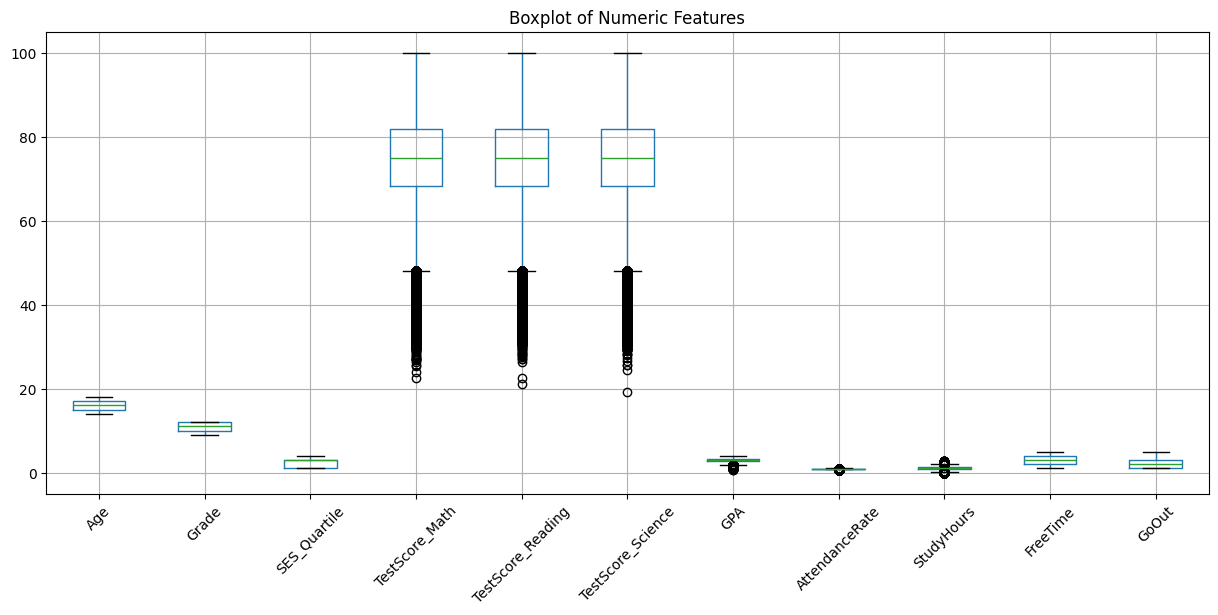

In [10]:
#BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = train_df_sample.select_dtypes(include=['int64', 'float64']).columns

#  drop yes or no features before using boxplot
features_to_exclude = ['InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic']
numeric_features_filtered = [feature for feature in numeric_features if feature not in features_to_exclude]

plt.figure(figsize=(15, 6))
train_df[numeric_features_filtered].boxplot()
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [11]:
def count_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers)

outlier_counts = {}
for feature in numeric_features_filtered:
    outlier_counts[feature] = count_outliers_iqr(train_df_sample, feature)

total_rows = len(train_df_sample)

print("Counting Outlier Amount using IQR :")
for feature, count in outlier_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{feature}: {count} ({percentage:.2f}%)")

Counting Outlier Amount using IQR :
Age: 0 (0.00%)
Grade: 0 (0.00%)
SES_Quartile: 0 (0.00%)
TestScore_Math: 2757 (0.34%)
TestScore_Reading: 2855 (0.36%)
TestScore_Science: 2805 (0.35%)
GPA: 2761 (0.35%)
AttendanceRate: 2811 (0.35%)
StudyHours: 5384 (0.67%)
FreeTime: 0 (0.00%)
GoOut: 0 (0.00%)


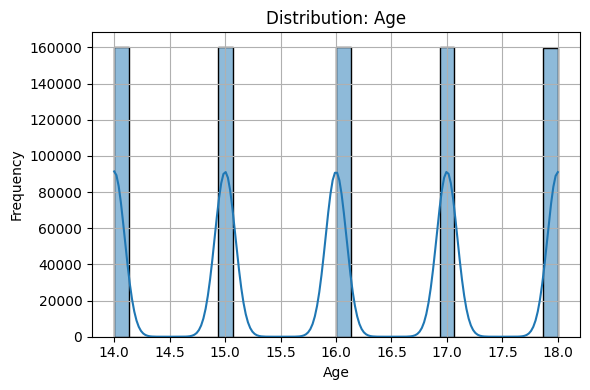

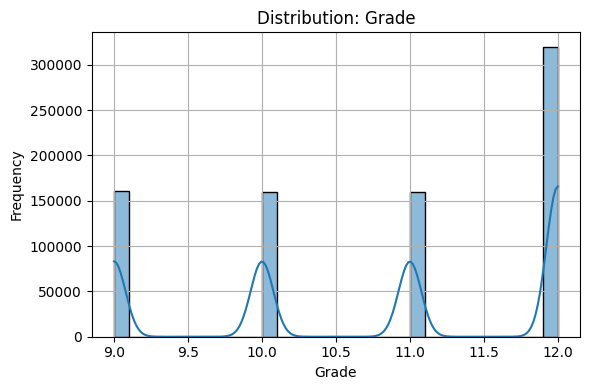

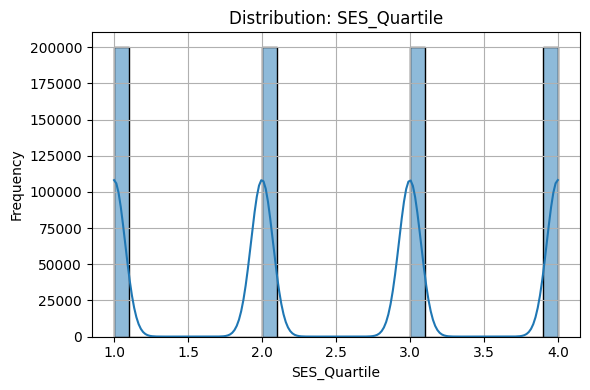

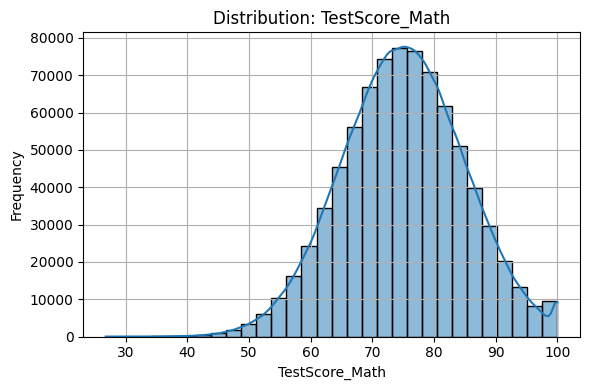

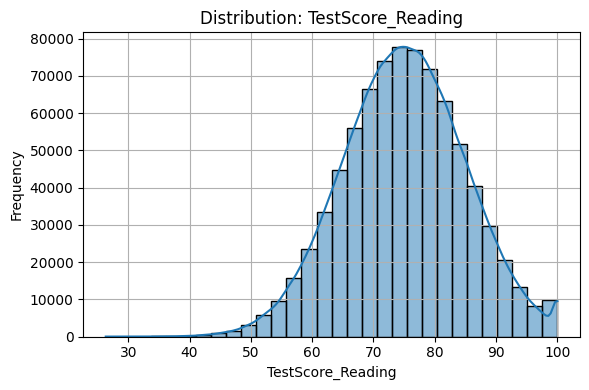

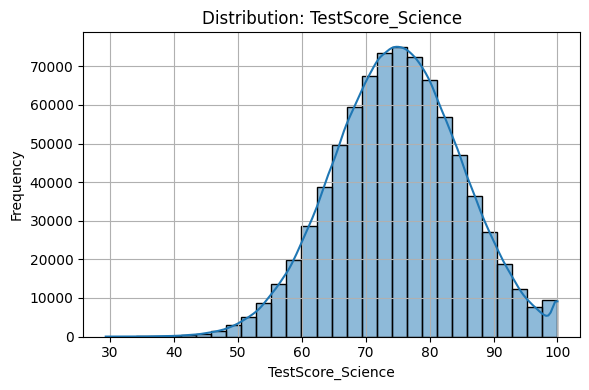

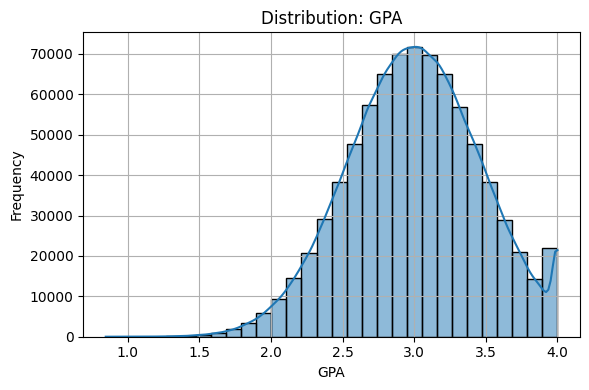

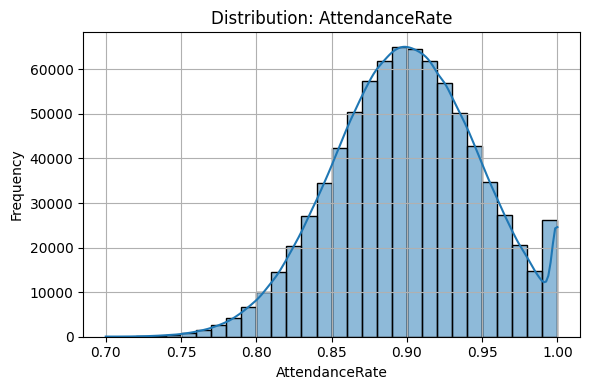

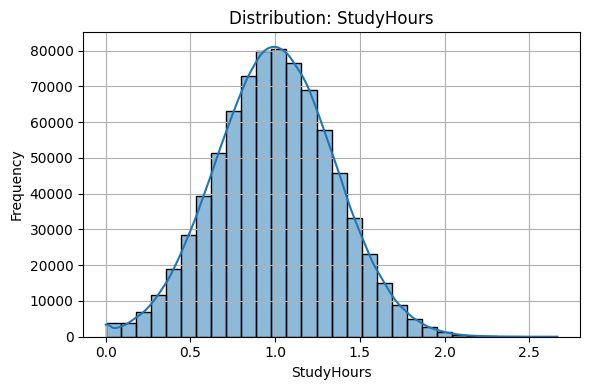

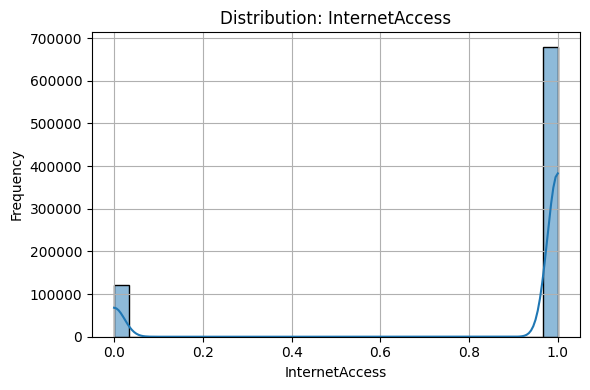

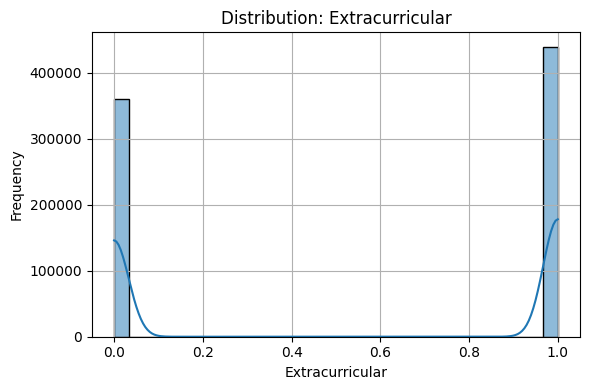

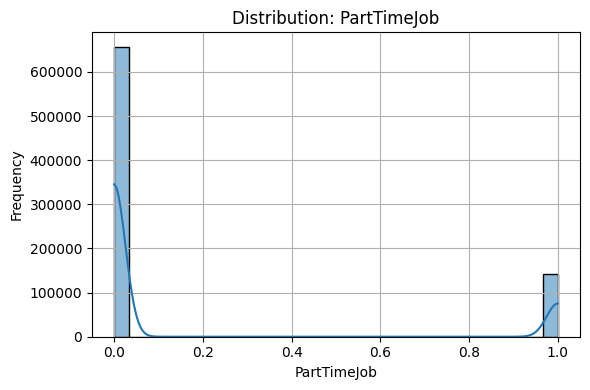

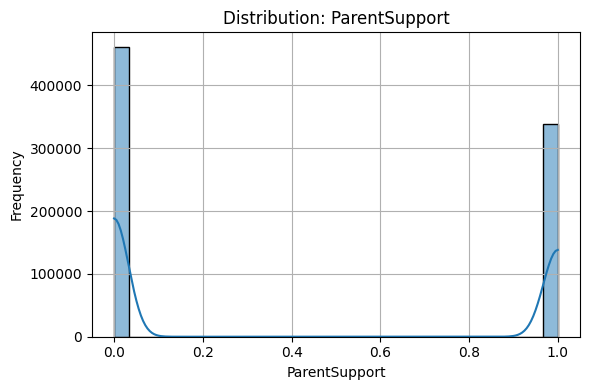

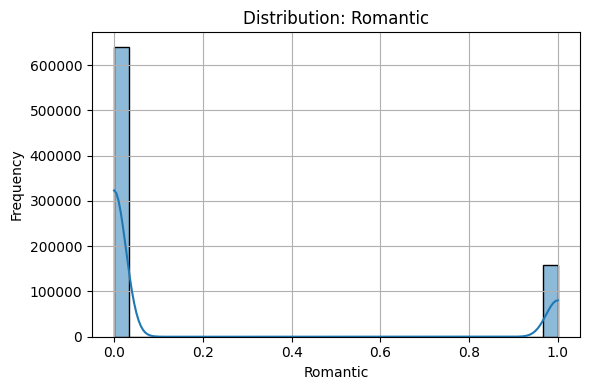

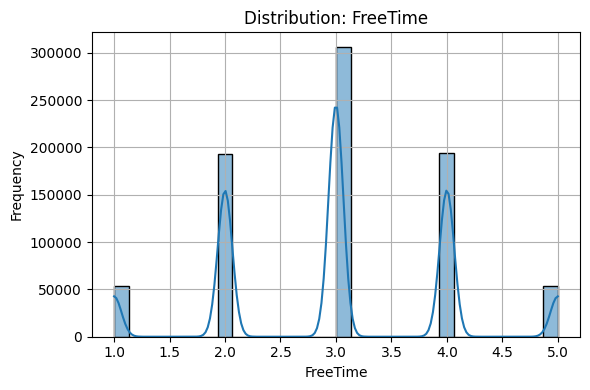

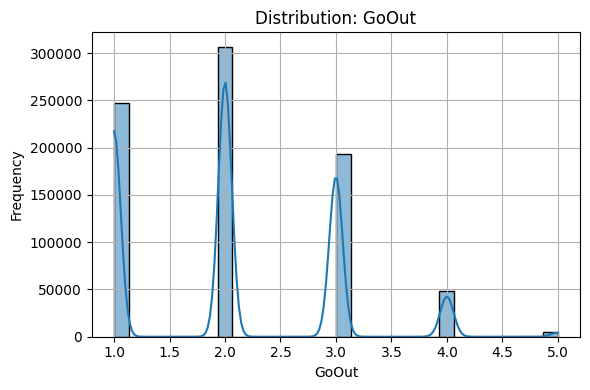

In [12]:
# Plot all of numeric features distribution
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df_sample[col], kde=True, bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Feature Engineering

#### Encoding Categorical Features

In [13]:
# Encoding categorical features (One-Hot)
categorical_features = ['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale']
train_df_enc = pd.get_dummies(train_df_sample, columns=categorical_features)
validation_df_enc = pd.get_dummies(validation_df_sample, columns=categorical_features)
test_df_enc = pd.get_dummies(test_df_sample, columns=categorical_features)

In [14]:
# Menyelaraskan kolom antara train dan test set.
# Parameter 'axis=1' SANGAT PENTING. Ini memberitahu pandas untuk menyamakan KOLOM, bukan BARIS.
# Jika axis=1 dihilangkan, test_df_enc akan dipaksa memiliki jumlah baris yang sama dengan train_df_enc.

print(f"Jumlah baris train_df_enc SEBELUM align: {len(train_df_enc)}")
print(f"Jumlah baris test_df_enc SEBELUM align: {len(test_df_enc)}")
print("-" * 30)

# Lakukan alignment dengan benar
train_df_enc, test_df_enc = train_df_enc.align(test_df_enc, join='left', axis=1, fill_value=0)
train_df_enc, validation_df_enc = train_df_enc.align(validation_df_enc, join='left', axis=1, fill_value=0)


print(f"Jumlah baris train_df_enc SETELAH align: {len(train_df_enc)}")
print(f"Jumlah baris test_df_enc SETELAH align: {len(test_df_enc)}")

Jumlah baris train_df_enc SEBELUM align: 800000
Jumlah baris test_df_enc SEBELUM align: 200000
------------------------------
Jumlah baris train_df_enc SETELAH align: 800000
Jumlah baris test_df_enc SETELAH align: 200000


#### Feature Selection

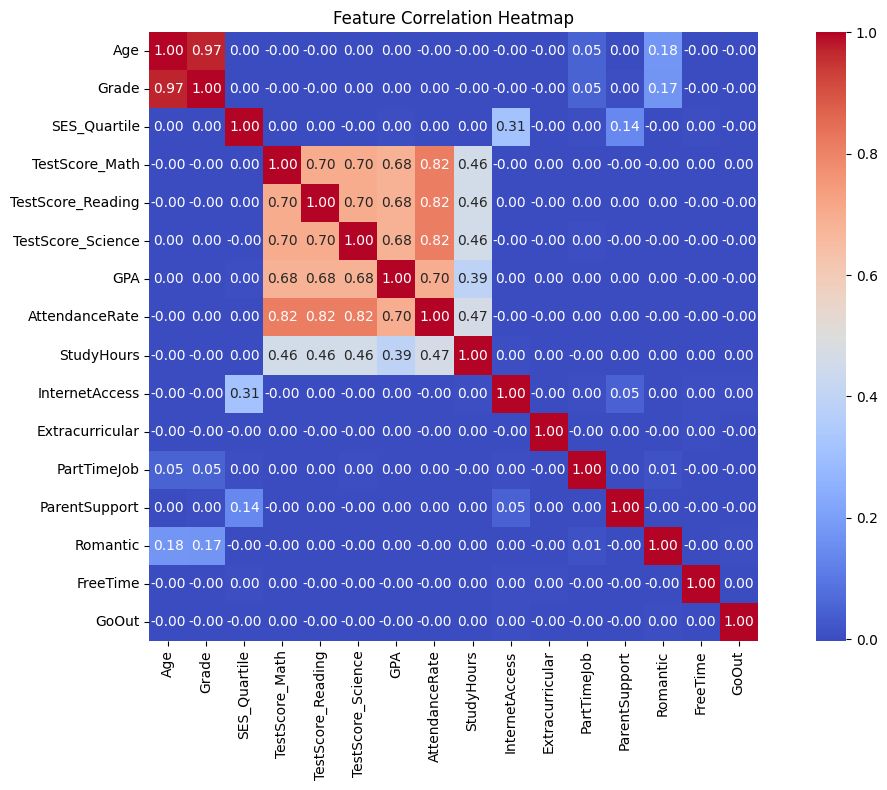

In [15]:
plt.figure(figsize=(12, 8))
corr_matrix = train_df_enc[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [16]:
selected_features = [
    'Grade',               
    'SES_Quartile',
    'TestScore_Math',
    'TestScore_Reading',
    'TestScore_Science',
    'GPA',
    'AttendanceRate',
    'StudyHours',
    'InternetAccess',
    'Extracurricular',
    'PartTimeJob',
    'ParentSupport',
    'Romantic',
    'FreeTime',
    'GoOut'
]

X = train_df_enc[selected_features]

#### Standardization



In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
print(X_scaled.shape)
print(pd.DataFrame(X_scaled, columns=selected_features).describe())

(800000, 15)
              Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
count  8.000000e+05  8.000000e+05    8.000000e+05       8.000000e+05   
mean   2.492584e-16  6.966872e-17    7.570122e-16      -4.351364e-16   
std    1.000001e+00  1.000001e+00    1.000001e+00       1.000001e+00   
min   -1.542000e+00 -1.341766e+00   -4.844265e+00      -4.885296e+00   
25%   -6.847694e-01 -4.472212e-01   -6.757878e-01      -6.764343e-01   
50%    1.724608e-01 -4.472212e-01    1.675822e-03       2.547138e-03   
75%    1.029691e+00  4.473241e-01    6.788957e-01       6.797478e-01   
max    1.029691e+00  1.341869e+00    2.513325e+00       2.511885e+00   

       TestScore_Science           GPA  AttendanceRate    StudyHours  \
count       8.000000e+05  8.000000e+05    8.000000e+05  8.000000e+05   
mean       -2.411582e-16 -2.063416e-16   -7.731416e-16  2.825118e-16   
std         1.000001e+00  1.000001e+00    1.000001e+00  1.000001e+00   
min        -4.583045e+00 -4.675178e+00   -4.146790

#### PCA Visualization

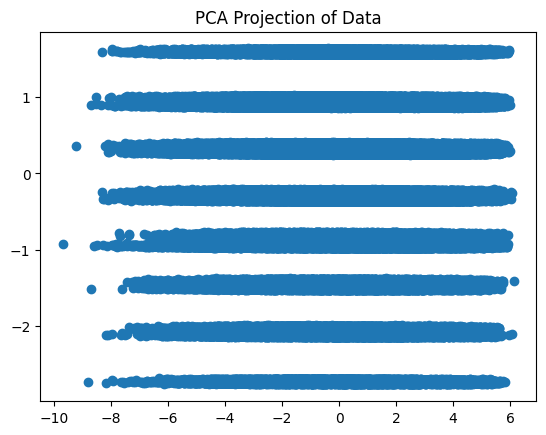

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection of Data')
plt.show()

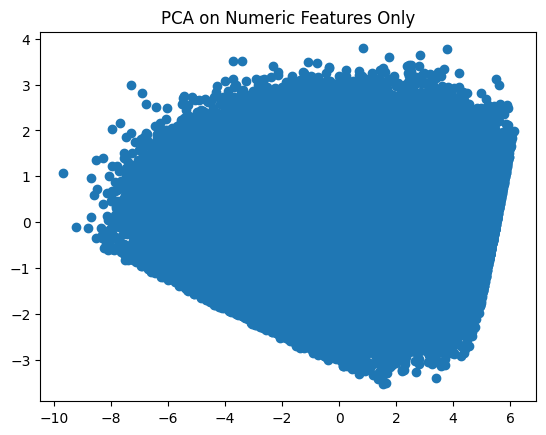

In [20]:
num_features = [col for col in selected_features if train_df_enc[col].nunique() > 10]
X_num = train_df_enc[num_features]
X_num_scaled = scaler.fit_transform(X_num)
X_num_pca = PCA(n_components=2).fit_transform(X_num_scaled)
plt.scatter(X_num_pca[:,0], X_num_pca[:,1])
plt.title('PCA on Numeric Features Only')
plt.show()

### Fix Feature Engineering

In [21]:
fix_selected_features = [
    'Grade',               
    'SES_Quartile',
    'TestScore_Math',
    'TestScore_Reading',
    'TestScore_Science',
    'GPA',
    'AttendanceRate',
    'StudyHours',
    'FreeTime',
    'GoOut',
]

X_selected = train_df_enc[fix_selected_features]

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_fix = scaler.fit_transform(X_selected)

In [23]:
print(X_scaled_fix.shape)
print(pd.DataFrame(X_scaled_fix, columns=fix_selected_features).describe())

(800000, 10)
              Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
count  8.000000e+05  8.000000e+05    8.000000e+05       8.000000e+05   
mean   2.492584e-16  6.966872e-17    7.570122e-16      -4.351364e-16   
std    1.000001e+00  1.000001e+00    1.000001e+00       1.000001e+00   
min   -1.542000e+00 -1.341766e+00   -4.844265e+00      -4.885296e+00   
25%   -6.847694e-01 -4.472212e-01   -6.757878e-01      -6.764343e-01   
50%    1.724608e-01 -4.472212e-01    1.675822e-03       2.547138e-03   
75%    1.029691e+00  4.473241e-01    6.788957e-01       6.797478e-01   
max    1.029691e+00  1.341869e+00    2.513325e+00       2.511885e+00   

       TestScore_Science           GPA  AttendanceRate    StudyHours  \
count       8.000000e+05  8.000000e+05    8.000000e+05  8.000000e+05   
mean       -2.411582e-16 -2.063416e-16   -7.731416e-16  2.825118e-16   
std         1.000001e+00  1.000001e+00    1.000001e+00  1.000001e+00   
min        -4.583045e+00 -4.675178e+00   -4.146790

In [24]:
X_df = pd.DataFrame(X_scaled_fix, columns=fix_selected_features)

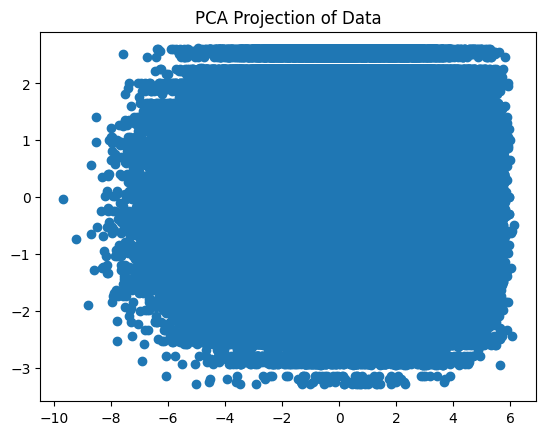

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection of Data')
plt.show()

## Training Model on Train Dataset

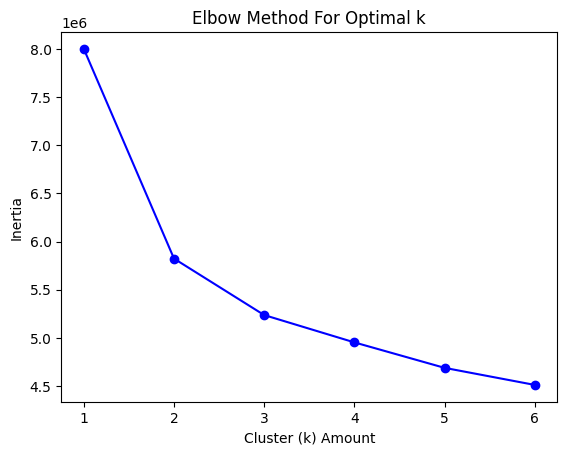

In [26]:
from sklearn.cluster import KMeans


inertia = []
K = range(1, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Cluster (k) Amount')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

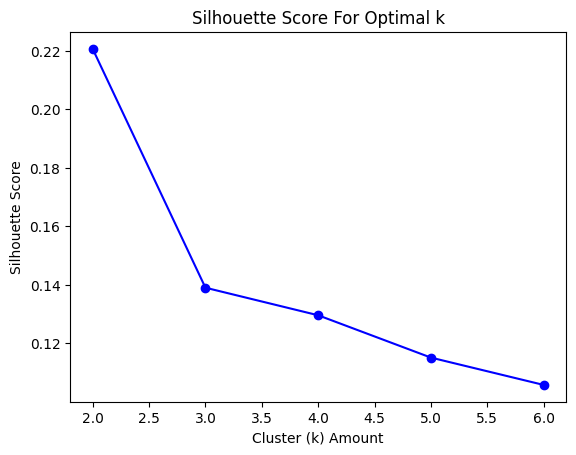

In [27]:
from sklearn.metrics import silhouette_score
X_sample = X_df.sample(n=200000, random_state=42)
silhouette_scores = []
K = range(2, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Cluster (k) Amount')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_df)
X_df['cluster'] = clusters

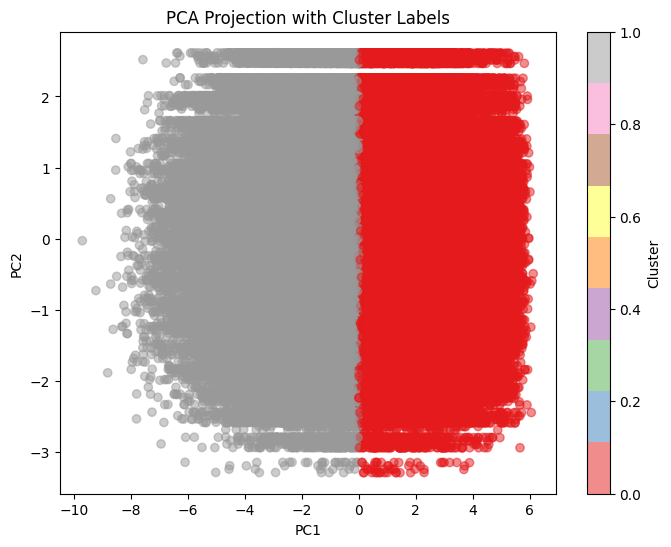

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df[fix_selected_features])

# Visualisasikan hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_df['cluster'], cmap='Set1', alpha=0.5)
plt.title('PCA Projection with Cluster Labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
cluster_summary = X_df.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)
# Menghitung dan menampilkan jumlah anggota per cluster
print("\nJumlah Anggota per Cluster:")
cluster_counts = X_df['cluster'].value_counts()
print(cluster_counts)

            Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
cluster                                                              
0       -0.000419      0.000097        0.700393           0.700389   
1        0.000421     -0.000098       -0.703928          -0.703925   

         TestScore_Science       GPA  AttendanceRate  StudyHours  FreeTime  \
cluster                                                                      
0                 0.699730  0.666644        0.748269    0.482967  0.000512   
1                -0.703262 -0.670009       -0.752046   -0.485405 -0.000515   

            GoOut  
cluster            
0       -0.001476  
1        0.001484  

Jumlah Anggota per Cluster:
cluster
0    401007
1    398993
Name: count, dtype: int64


In [31]:
import pandas as pd

# Define the features and cluster values
features = ['Grade', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading',
            'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'FreeTime', 'GoOut']


cluster_0 = [-0.000419, 0.000097, 0.700393, 0.700389, 0.699730, 0.666644, 0.748269, 0.482967, 0.000512, -0.001476]
cluster_1 = [0.000421, -0.000098, -0.703928, -0.703925, -0.703262, -0.670009, -0.752046, -0.485405, -0.000515, 0.001484]


cluster_data = {
    'Feature': features,
    'Diligent': cluster_0,
    'Lazy': cluster_1
}
df_cluster_summary = pd.DataFrame(cluster_data)


cluster_counts_dict = {'Diligent': 401007, 'Lazy': 398993}
caption = f"📊 Cluster Characteristics per Cluster (KMeans – K=2) | Jumlah: Diligent={cluster_counts_dict['Diligent']}, Lazy={cluster_counts_dict['Lazy']}"


styled = df_cluster_summary.style.set_caption(caption) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center')]
    }])

display(styled)

,Feature,Diligent,Lazy
0,Grade,-0.000419,0.000421
1,SES_Quartile,0.000097,-0.000098
2,TestScore_Math,0.700393,-0.703928
3,TestScore_Reading,0.700389,-0.703925
4,TestScore_Science,0.699730,-0.703262
5,GPA,0.666644,-0.670009
6,AttendanceRate,0.748269,-0.752046
7,StudyHours,0.482967,-0.485405
8,FreeTime,0.000512,-0.000515
9,GoOut,-0.001476,0.001484


In [32]:
X_selected['cluster'] = clusters

cluster_summary = X_selected.groupby('cluster').mean()
print(cluster_summary)

# Menghitung dan menampilkan jumlah anggota per cluster
print("\nJumlah Anggota per Cluster:")
cluster_counts = X_selected['cluster'].value_counts()
print(cluster_counts)

             Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
cluster                                                               
0        10.798328      2.500051       81.952445          81.959271   
1        10.799307      2.499833       67.972576          67.973669   

         TestScore_Science       GPA  AttendanceRate  StudyHours  FreeTime  \
cluster                                                                      
0                81.959608  3.303925        0.935661    1.167652  3.000915   
1                67.980227  2.688756        0.863432    0.829834  2.999880   

            GoOut  
cluster            
0        2.070136  
1        2.072851  

Jumlah Anggota per Cluster:
cluster
0    401007
1    398993
Name: count, dtype: int64


/var/folders/_3/ps6qlz7d5fng_q71k5bdf2km0000gn/T/ipykernel_72155/1124973464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['cluster'] = clusters


In [33]:
features = [
    'Grade', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading',
    'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'FreeTime', 'GoOut'
]

cluster_0 = [10.798328, 2.500051, 81.952445, 81.959271, 81.959608, 3.303925, 0.935661, 1.167652, 3.000915, 2.070136]
cluster_1 = [10.799307, 2.499833, 67.972576, 67.973669, 67.980227, 2.688756, 0.863432, 0.829834, 2.999880, 2.072851]

cluster_counts_dict = {'Diligent': 401007, 'Lazy': 398993}

cluster_data = {
    'Feature': features,
    'Diligent': cluster_0,
    'Lazy': cluster_1
}
df_cluster_summary = pd.DataFrame(cluster_data)

caption = f"📊 Cluster Characteristics per Cluster (KMeans – K=2) | Total: Diligent={cluster_counts_dict['Diligent']}, Lazy={cluster_counts_dict['Lazy']}"

styled = df_cluster_summary.style.set_caption(caption) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center')]
    }])

display(styled)



,Feature,Diligent,Lazy
0,Grade,10.798328,10.799307
1,SES_Quartile,2.500051,2.499833
2,TestScore_Math,81.952445,67.972576
3,TestScore_Reading,81.959271,67.973669
4,TestScore_Science,81.959608,67.980227
5,GPA,3.303925,2.688756
6,AttendanceRate,0.935661,0.863432
7,StudyHours,1.167652,0.829834
8,FreeTime,3.000915,2.999880
9,GoOut,2.070136,2.072851



| Cluster | Segment Name        | Key Characteristics                                                                |
|---------|--------------------|-------------------------------------------------------------------------------------|
| 1       | Lazy Students      | Lower GPA, lower attendance, lower study hours, lower test scores. |
| 0       | Diligent Students  | Higher GPA, higher attendance, higher study hours, higher test scores. |


In [36]:
X_selected.to_csv('clustered_students.csv', index=False)
X_df.to_csv('clustered_students_scaled.csv', index=False)

## Implement to Test Dataset

In [49]:
# 1. Selaraskan kolom-kolom dari test_df_enc dengan kolom-kolom yang digunakan untuk training (X_df)
# Kita buat variabel baru 'test_df_aligned' agar tidak mengubah 'test_df_enc' yang asli.
test_df_aligned = test_df_enc.reindex(columns=X_df.columns, fill_value=0)

# 2. Pilih fitur-fitur yang relevan dari data uji yang sudah diselaraskan
X_test_selected = test_df_aligned[fix_selected_features]

# 3. Lakukan scaling pada fitur-fitur data uji
X_test_scaled = scaler.transform(X_test_selected)

# 4. Buat DataFrame final untuk di-umpan ke model KMeans
X_test_final = pd.DataFrame(X_test_scaled, columns=fix_selected_features)

# 5. Prediksi cluster untuk data uji
test_clusters = kmeans.predict(X_test_final)

# 6. Buat salinan dari dataframe uji ASLI untuk menempelkan hasil cluster
# Kita gunakan 'test_df_enc' yang asli (yang seharusnya berisi 10,000 baris setelah restart kernel)
test_df_clustered = test_df_enc.copy()
test_df_clustered['cluster'] = test_clusters
test_df_clustered['cluster_label'] = test_df_clustered['cluster'].map({0: 'Diligent', 1: 'Lazy'})

# 7. Tampilkan ringkasan cluster dari data uji
test_cluster_summary = test_df_clustered.groupby('cluster_label')[fix_selected_features].mean()
print("Rangkuman Cluster untuk Data Uji:")
print(test_cluster_summary)

# 8. Tampilkan jumlah anggota cluster dari data uji
print("\nJumlah Anggota per Cluster pada Data Uji:")
print(test_df_clustered['cluster'].value_counts())

Rangkuman Cluster untuk Data Uji:
                   Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
cluster_label                                                               
Diligent       10.795965      2.501820       81.923337          81.947138   
Lazy           10.801244      2.503169       67.995384          67.972361   

               TestScore_Science       GPA  AttendanceRate  StudyHours  \
cluster_label                                                            
Diligent               81.921845  3.303127        0.935385    1.167233   
Lazy                   68.022295  2.690805        0.863469    0.830811   

               FreeTime     GoOut  
cluster_label                      
Diligent       3.002481  2.072066  
Lazy           2.999210  2.068955  

Jumlah Anggota per Cluster pada Data Uji:
cluster
1    100022
0     99978
Name: count, dtype: int64


In [51]:
import pandas as pd
from IPython.display import display

features = [
    'Grade', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading',
    'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'FreeTime', 'GoOut'
]

diligent_cluster = [10.795965, 2.501820, 81.923337, 81.947138, 81.921845, 3.303127, 0.935385, 1.167233, 3.002481, 2.072066]
lazy_cluster = [10.801244, 2.503169, 67.995384, 67.972361, 68.022295, 2.690805, 0.863469, 0.830811, 2.999210, 2.068955]

cluster_data = {
    'Feature': features,
    'Diligent': diligent_cluster,
    'Lazy': lazy_cluster
}
df_cluster_summary_test = pd.DataFrame(cluster_data)

# Berdasarkan gambar, diasumsikan cluster 0 adalah 'Diligent' dan cluster 1 adalah 'Lazy'
test_cluster_counts_dict = {'Lazy': 100022, 'Diligent': 99978}

caption = f"📊 Cluster Characteristics on Test Dataset (KMeans – K=2) | Total: Diligent={test_cluster_counts_dict['Diligent']}, Lazy={test_cluster_counts_dict['Lazy']}"

tyled = df_cluster_summary.style.set_caption(caption) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center')]
    }])

display(styled)

,Feature,Diligent,Lazy
0,Grade,10.798328,10.799307
1,SES_Quartile,2.500051,2.499833
2,TestScore_Math,81.952445,67.972576
3,TestScore_Reading,81.959271,67.973669
4,TestScore_Science,81.959608,67.980227
5,GPA,3.303925,2.688756
6,AttendanceRate,0.935661,0.863432
7,StudyHours,1.167652,0.829834
8,FreeTime,3.000915,2.999880
9,GoOut,2.070136,2.072851



| Cluster | Segment Name        | Key Characteristics                                                                |
|---------|--------------------|-------------------------------------------------------------------------------------|
| 1       | Lazy Students      | Lower GPA, lower attendance, lower study hours, lower test scores. |
| 0       | Diligent Students  | Higher GPA, higher attendance, higher study hours, higher test scores. |


In [52]:
test_df_clustered.to_csv('clustered_students.csv', index=False)